<a href="https://colab.research.google.com/github/DhaifinaAP/python_for_datascience/blob/main/Tugas_5_SIB_DS_Cakap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas 5 SIB-DS Cakap

link dataset : https://www.kaggle.com/datasets/ariyoomotade/netflix-data-cleaning-analysis-and-visualization

## Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [ ]:
import pandas as pd

# path to your dataset in Google Drive
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SIB-DS CAKAP/Tugas 5 SIB-DS Cakap/netflix1.csv')

df


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


## Functional Programming

### Fungsi Rekursif dan Lambda

In [ ]:
import sys
sys.setrecursionlimit(10000)

In [ ]:
# Function to calculate the total duration of movies or TV shows recursively
def total_duration(dataframe, show_type):

    # Filter the dataframe for the specified show type
    filtered_data = dataframe[dataframe['type'] == show_type]

    # Base case: if the filtered dataframe is empty, return 0
    if filtered_data.empty:
        return 0

    # Lambda function to extract duration in minutes (assuming format like '90 min')
    duration_extract = lambda duration: int(duration.split(' ')[0]) if 'min' or 'Season' in duration else 0

    # Calculate duration of the first item
    first_duration = duration_extract(filtered_data['duration'].iloc[0])

    # Recursive call for the rest of the filtered dataframe
    rest_duration = total_duration(filtered_data.iloc[1:], show_type)

    return first_duration + rest_duration

# Find the total duration for 'Movie'
movie_total_duration = total_duration(df, 'Movie')
print(f"Total duration for movies is: {movie_total_duration} minutes")

# Find the total duration for 'TV Show'
tv_show_total_duration = total_duration(df, 'TV Show')
print(f"Total duration for TV shows is: {tv_show_total_duration} Seasons")


Total duration for movies is: 610057 minutes
Total duration for TV shows is: 4667 Seasons


### Fungsi First-Class

In [ ]:
# Fungsi kelas pertama: Mendefinisikan fungsi yang menerima fungsi sebagai argumen
def custom_filter(dataframe, filter_func):

    return dataframe[dataframe.apply(filter_func, axis=1)]

# Fungsi lambda untuk menyaring baris berdasarkan tahun rilis (lebih dari 2020)
release_year_filter = lambda row: row['release_year'] > 2020

# Menggunakan fungsi custom_filter dengan release_year_filter
recent_releases = custom_filter(df, release_year_filter)

print("Jumlah rilis terbaru:", len(recent_releases))

# Menampilkan DataFrame yang difilter (rilis terbaru)
recent_releases.head()

Jumlah rilis terbaru: 592


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
5,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,9/24/2021,2021,TV-14,9 Seasons,"British TV Shows, Reality TV"
6,s10,Movie,The Starling,Theodore Melfi,United States,9/24/2021,2021,PG-13,104 min,"Comedies, Dramas"


## Numpy

In [ ]:
df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


### Statistic

In [ ]:
import numpy as np

# Filter hanya untuk film
df_movies = df[df['type'] == 'Movie'].copy()  # Gunakan .copy() untuk membuat salinan yang aman

# Mengambil kolom durasi dan mengonversinya ke numerik menggunakan .loc
df_movies.loc[:, 'duration_numeric'] = df_movies['duration'].apply(lambda x: int(x.split(' ')[0]) if 'min' in x else np.nan)

# Menggunakan fungsi statistik dari NumPy
mean_duration = np.mean(df_movies['duration_numeric'])
median_duration = np.median(df_movies['duration_numeric'])
std_duration = np.std(df_movies['duration_numeric'])

print(f"Rata-rata durasi film: {mean_duration} menit")
print(f"Median durasi film: {median_duration} menit")
print(f"Standar deviasi durasi film: {std_duration} menit")


Rata-rata durasi film: 99.58488410055502 menit
Median durasi film: 98.0 menit
Standar deviasi durasi film: 28.280916043401824 menit


### Join

In [ ]:
# Contoh: Gabungkan kolom 'release_year' dan 'duration_numeric' menjadi satu array 2D
release_year_array = np.array(df_movies['release_year'])
duration_array = np.array(df_movies['duration_numeric'])

# Gabungkan kolom menggunakan NumPy
joined_array = np.column_stack((release_year_array, duration_array))
print(joined_array[:5])  # Menampilkan 5 baris pertama hasil penggabungan


[[2020   90]
 [2021   91]
 [1993  125]
 [2021  104]
 [2019   87]]


### Splitting

In [ ]:
# Membagi array durasi film menjadi dua bagian
split_arrays = np.array_split(duration_array, 2)

# Menampilkan hasil pemisahan
print("Bagian pertama dari array durasi film:", split_arrays[0])
print("Bagian kedua dari array durasi film:", split_arrays[1])


Bagian pertama dari array durasi film: [ 90  91 125 ... 100 113  40]
Bagian kedua dari array durasi film: [105  24  94 ... 136  89  78]


###  Matrix Operation

In [ ]:
# Bagian pertama dan kedua dari array durasi film
array_1 = split_arrays[0]
array_2 = split_arrays[1]

# Pastikan kedua array memiliki panjang yang sama sebelum operasi matriks
array_1 = array_1[:9]  # Potong array agar ukurannya sama
array_2 = array_2[:9]  # Potong array agar ukurannya sama

print("Array 1:\n", array_1.reshape(3,3))
print("\nArray 2:\n", array_2.reshape(3,3))

# 1. Menambahkan dua matriks (vektor)
matrix_sum = np.add(array_1, array_2)
print("\nHasil penjumlahan dua matriks:")
print(matrix_sum.reshape(3,3))

# 2. Mengalikan elemen-elemen dari dua matriks
matrix_elementwise_multiply = np.multiply(array_1, array_2)
print("\nHasil perkalian elemen demi elemen dua matriks:")
print(matrix_elementwise_multiply.reshape(3,3))

# 3. Perkalian matriks
# Mengubah array 1D menjadi matriks kolom 2D sebelum melakukan perkalian matriks
array_1_reshaped = array_1.reshape(3, 3)
array_2_reshaped = array_2.reshape(3, 3)

# Mengalikan dua matriks
matrix_multiply = np.dot(array_1_reshaped, array_2_reshaped)
print("\nHasil perkalian matriks:")
print(matrix_multiply)

Array 1:
 [[ 90  91 125]
 [104  87 127]
 [ 76  76  71]]

Array 2:
 [[105  24  94]
 [109  99  89]
 [ 92 105 130]]

Hasil penjumlahan dua matriks:
[[195 115 219]
 [213 186 216]
 [168 181 201]]

Hasil perkalian elemen demi elemen dua matriks:
[[ 9450  2184 11750]
 [11336  8613 11303]
 [ 6992  7980  9230]]

Hasil perkalian matriks:
[[30869 24294 32809]
 [32087 24444 34029]
 [22796 16803 23138]]


## Pandas

In [ ]:
df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


### Filter

In [ ]:
# Filter the dataframe to only include movies released after 2010.
df_filtered = df[(df.type == 'Movie') & (df.release_year > 2010)]
df_filtered.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
6,s10,Movie,The Starling,Theodore Melfi,United States,9/24/2021,2021,PG-13,104 min,"Comedies, Dramas"
7,s939,Movie,Motu Patlu in the Game of Zones,Suhas Kadav,India,5/1/2021,2019,TV-Y7,87 min,"Children & Family Movies, Comedies, Music & Mu..."
8,s13,Movie,Je Suis Karl,Christian Schwochow,Germany,9/23/2021,2021,TV-MA,127 min,"Dramas, International Movies"


### Replace

In [ ]:
# Replace all instances of 'United States' in the country column with 'USA'.
df_replaced = df_filtered.replace({'country': {'United States': 'USA'}})
df_replaced.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,USA,9/25/2021,2020,PG-13,90 min,Documentaries
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
6,s10,Movie,The Starling,Theodore Melfi,USA,9/24/2021,2021,PG-13,104 min,"Comedies, Dramas"
7,s939,Movie,Motu Patlu in the Game of Zones,Suhas Kadav,India,5/1/2021,2019,TV-Y7,87 min,"Children & Family Movies, Comedies, Music & Mu..."
8,s13,Movie,Je Suis Karl,Christian Schwochow,Germany,9/23/2021,2021,TV-MA,127 min,"Dramas, International Movies"


### Group

In [ ]:
# Group the dataframe by the 'country' column and calculate the mean release year for each country.
df_grouped = df_replaced.groupby('country')['release_year'].mean()
df_grouped

,release_year
country,
Argentina,2017.625000
Australia,2016.764706
Austria,2017.625000
Bangladesh,2017.666667
Belgium,2017.777778
...,...
United Kingdom,2016.628931
Uruguay,2018.571429
Venezuela,2017.000000


## Visualization

### Data Cleaning

In [ ]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [ ]:
df.describe()

,release_year,duration
count,8790.000000,8790.000000
mean,2014.183163,69.403527
std,8.825466,51.501503
min,1925.000000,0.000000
25%,2013.000000,0.000000
50%,2017.000000,88.500000
75%,2019.000000,106.000000
max,2021.000000,312.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [ ]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
country,0
date_added,0
release_year,0
rating,0
duration,0
listed_in,0


In [ ]:
df.drop_duplicates()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


### Visualization

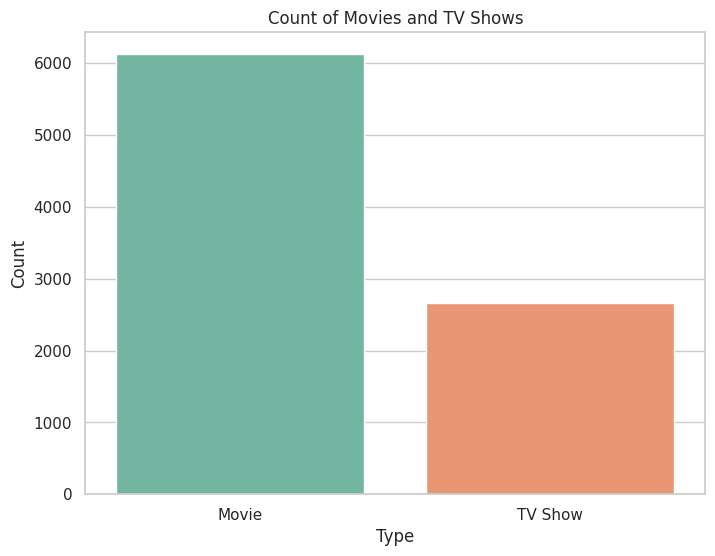

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Clean the dataset if needed
# Convert duration from string to numeric (for movies)
def extract_duration(duration):
    if 'min' in duration:
        return int(duration.split(' ')[0])
    else :
        return 0  # Assuming we don't want to count TV shows in duration
    return None

df['duration'] = df['duration'].apply(extract_duration)

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# 1. Count plot for the number of movies and TV shows by type
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=df, palette='Set2')
plt.title('Count of Movies and TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


In [ ]:
showtype = df['type'].value_counts()
showtype

,count
type,
Movie,6126
TV Show,2664


In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Pie(labels=['Movie', 'TV Show'],
                             values=[showtype[0], showtype[1]],
                             title='Movie Vs TV Show',
                             marker=dict(colors=['orange', 'green']))])

fig.show()

In [ ]:
ratings = df['rating'].value_counts().head(5)
ratings

,count
rating,
TV-MA,3205
TV-14,2157
TV-PG,861
R,799
PG-13,490


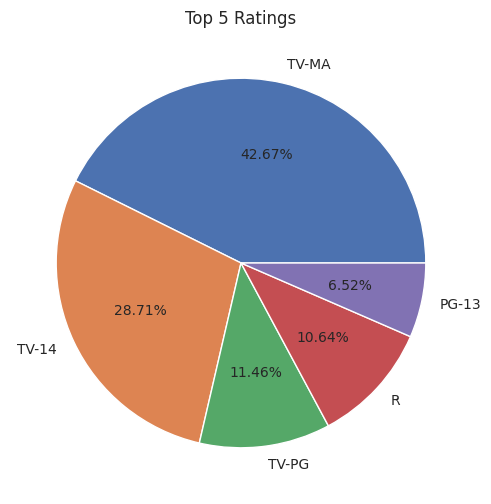

In [ ]:
plt.figure(figsize=(20,6))
plt.title('Top 5 Ratings')
plt.pie(ratings, labels=ratings.index, autopct='%1.2f%%', textprops={'fontsize': 10})
plt.show()


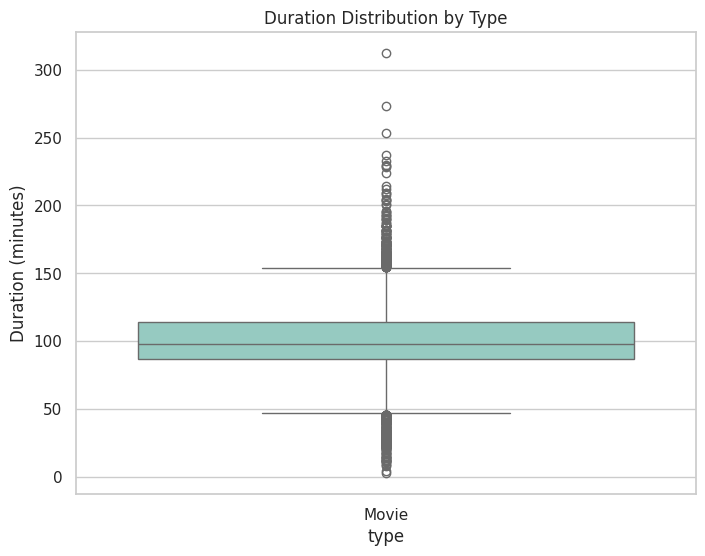

In [ ]:
# Filter the dataframe to only include movies
plt.figure(figsize=(8, 6))
sns.boxplot(x='type', y='duration', data=df[df['type'] == 'Movie'], palette='Set3')
plt.title('Duration Distribution by Type')
plt.ylabel('Duration (minutes)')
plt.show()

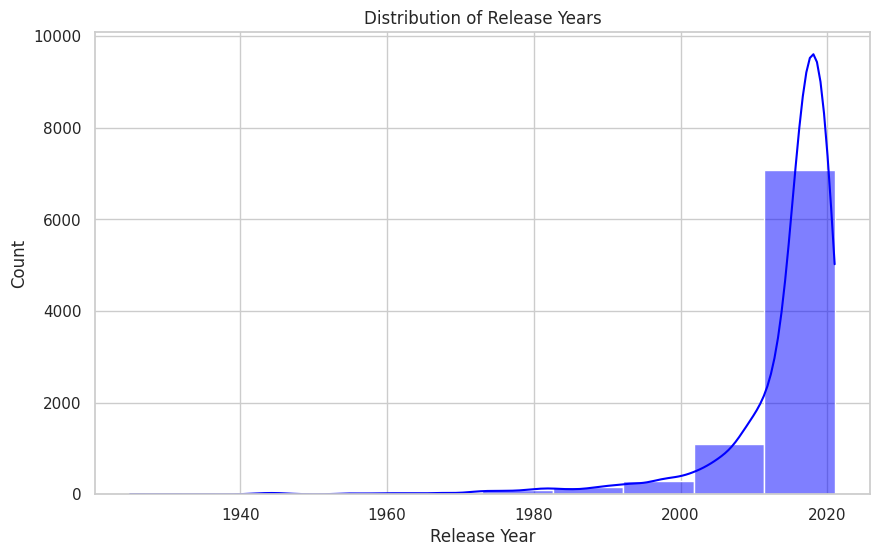

In [ ]:
# Histogram to visualize the distribution of release years
plt.figure(figsize=(10, 6))
sns.histplot(df['release_year'], bins=10, kde=True, color='blue')
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()